Name: Vedika Desai  
Rollno: 21102B0060  
BE CMPN B (B4)  
Github: https://github.com/desaivedika/ML-Exp_Sem-7.git

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
breast_cancer_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
breast_cancer_columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
breast_cancer_df = pd.read_csv(breast_cancer_url, header=None, names=breast_cancer_columns)

# Prepare the dataset
X_cancer = breast_cancer_df.drop(['ID', 'Diagnosis'], axis=1)
y_cancer = breast_cancer_df['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split the dataset into training and testing sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

# Load the California Housing Dataset
housing_url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
housing_df = pd.read_csv(housing_url)

# Prepare the dataset
X_housing = housing_df.drop(['median_house_value'], axis=1)
y_housing = housing_df['median_house_value']

# Split the dataset into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

In [4]:
# Initialize the models
rf_classifier = RandomForestClassifier(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)


In [5]:
# Train the models
rf_classifier.fit(X_train_cancer, y_train_cancer)
rf_regressor.fit(X_train_housing, y_train_housing)
# Make predictions
y_pred_cancer = rf_classifier.predict(X_test_cancer)
y_pred_proba_cancer = rf_classifier.predict_proba(X_test_cancer)[:, 1]
y_pred_housing = rf_regressor.predict(X_test_housing)

In [6]:
# Classification Metrics
accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
precision = precision_score(y_test_cancer, y_pred_cancer)
recall = recall_score(y_test_cancer, y_pred_cancer)
f1 = f1_score(y_test_cancer, y_pred_cancer)
roc_auc = roc_auc_score(y_test_cancer, y_pred_proba_cancer)

# Regression Metrics
mse = mean_squared_error(y_test_housing, y_pred_housing)
r_squared = r2_score(y_test_housing, y_pred_housing)

# Output metrics
print("Classification Metrics")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

print("\nRegression Metrics")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r_squared}")

Classification Metrics
Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
F1 Score: 0.9593495934959351
ROC AUC: 0.9968400940623162

Regression Metrics
Mean Squared Error: 2560410737.09187
R-Squared: 0.8146160365959992


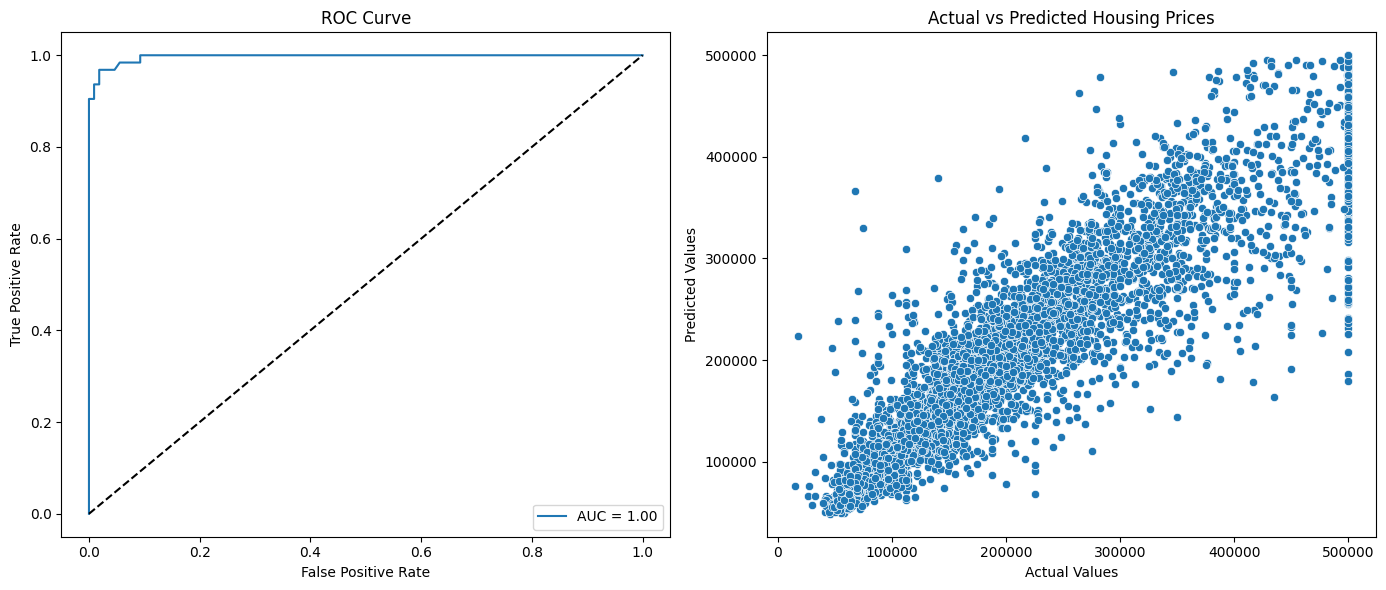

In [7]:
# Plot ROC curve for Classification Task
fpr, tpr, _ = roc_curve(y_test_cancer, y_pred_proba_cancer)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Actual vs Predicted for Regression Task
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_housing, y=y_pred_housing)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices')

plt.tight_layout()
plt.show()

In [11]:
y_pred_cancer=rf_classifier.predict(X_test_cancer)

In [9]:
y_pred_housing=rf_regressor.predict(X_test_housing)

In [10]:
print("Predictions for Classification Task (Breast Cancer):",y_pred_cancer)
print("Predictions for Classification Task (House Prediction):",y_pred_housing)

Predictions for Classification Task (Breast Cancer): [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Predictions for Classification Task (House Prediction): [143426.   476773.46  85703.   ... 184973.01 284558.01  96358.  ]
